In [32]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [33]:
from zipfile import ZipFile
filename= "/content/drive/MyDrive/Databyte task 1.zip"
with ZipFile(filename,'r')as zip:
  zip.extractall()
  print('extracted successfully')

extracted successfully


In [34]:
train_dir="/content/Databyte task 1/avengers_train"
test_dir="/content/Databyte task 1/avengers_test"

In [35]:
img_size = 500

batch_size = 50

images = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True
)

train_data = images.flow_from_directory(
    batch_size = batch_size,
    directory = train_dir,
    shuffle = True,
    target_size = (img_size,img_size)
)

image_train = keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    width_shift_range = 0.12,
    height_shift_range = 0.12,
    horizontal_flip=True
)

train_data = image_train.flow_from_directory(
    batch_size=batch_size,
    directory=train_dir,
    shuffle=True,
    target_size=(img_size,img_size),
    class_mode='sparse'
)



Found 500 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


In [36]:
image_test = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_data = image_test.flow_from_directory(
    batch_size=batch_size,
    directory=test_dir,
    target_size=(img_size, img_size),
    class_mode='sparse'
)

Found 100 images belonging to 5 classes.


In [39]:
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(img_size, img_size, 3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(512, activation='relu'))

model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(5, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_data,
    steps_per_epoch=int(np.ceil(train_data.n / float(batch_size))),
    epochs=15,
    validation_data=test_data,
    validation_steps=int(np.ceil(test_data.n / float(batch_size)))
)

In [41]:
model.evaluate(test_data,batch_size=batch_size, return_dict=True)


2/2 [==============================] - 6s 2s/step - loss: 0.7707 - accuracy: 0.7500


{'loss': 0.7707322835922241, 'accuracy': 0.75}

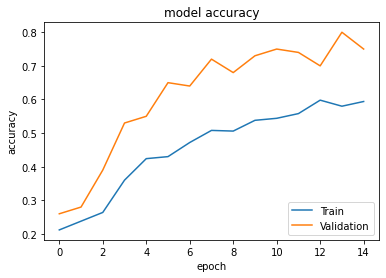

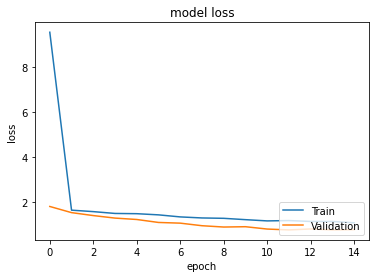

In [42]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()